# Brain Tumor detection from MRI using CNN

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
start_time = time.time()


#### Loading and exploring the data

In [2]:
#Folder names in our dataset
os.listdir('E:/MS ES DS/EAS 508/project/braintumordatasetBIG')

['no', 'yes']

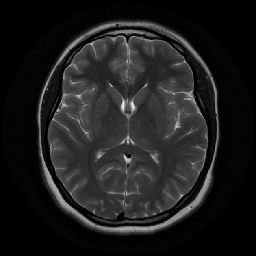

In [3]:
#Sample of a 'No' Image
Image.open('E:/MS ES DS/EAS 508/project/braintumordatasetBIG/no/1 no.jpeg').resize((256, 256))

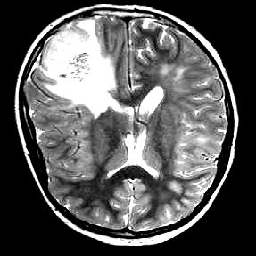

In [4]:
#Sample of an 'Yes' Image
Image.open('E:/MS ES DS/EAS 508/project/braintumordatasetBIG/yes/y0.jpg').resize((256, 256))

In [5]:
#names of yes images
yes = os.listdir('E:/MS ES DS/EAS 508/project/braintumordatasetBIG/yes')
yes

In [6]:
#names of 'no' images
no = os.listdir('E:/MS ES DS/EAS 508/project/braintumordatasetBIG/no')
no

In [7]:
#Number of 'yes' images
num_yes = len(yes)
num_yes

1501

In [8]:
#Number of 'no' images
num_no = len(no)
num_no

1586

In [10]:
#Array with names of all images
names = np.concatenate([yes, no])
names

array(['y0.jpg', 'y1.jpg', 'y10.jpg', ..., 'no997.jpg', 'no998.jpg',
       'no999.jpg'], dtype='<U10')

In [11]:
#Total number of images in the dataset
len(names)

3087

In [12]:
#Array of length equal to number of 'yes' images 
tumor_yes = np.full(num_yes, 1)

#Array of length equal to number of 'no' images 
tumor_no = np.full(num_no, 0)

In [13]:
#Array with all target value for all the images in the dataset
tumor = np.concatenate([tumor_yes, tumor_no])

In [14]:
len(tumor)

3087

In [15]:
## Preprocessing and loading the images into X set
# Loading yes files
X = []
for file in yes:
    image = cv2.imread('E:/MS ES DS/EAS 508/project/braintumordatasetBIG/yes/'+file)
    face = cv2.resize(image, (32, 32) )
    (b, g, r) = cv2.split(face) 
    image = cv2.merge([r,g,b])
    X.append(image)


# Loading no files
for file in no:
    image = cv2.imread('E:/MS ES DS/EAS 508/project/braintumordatasetBIG/no/'+file)
    face = cv2.resize(image, (32, 32) )
    (b, g, r) = cv2.split(face) 
    image = cv2.merge([r,g,b])
    X.append(image)

In [16]:
np.shape(X)

(3087, 32, 32, 3)

In [17]:
X = np.squeeze(X)

In [18]:
X.dtype

dtype('uint8')

In [19]:
## Normalizing the data in the images
# Converting to float
X = X.astype('float')

# Normalizing
X = X/255

In [20]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

#### Splitting the data into train and test set (70 - 30)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, tumor, test_size=0.3, random_state=10)

In [22]:
len(X_test)

927

#### Building the model - CNN

In [23]:
#Model building
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

#2D Convolution layer
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

#2D Convolution layer - repeated
model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

#Flattening
model.add(tf.keras.layers.Flatten())

#Fully connected dense layer with ReLU activation function and dropout to reduce overfitting
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))

#Fully connected dense layer with sigmoid activation function
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [24]:
#Summary of the layers in the CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

#### Configuring the model

In [25]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

#### Fitting the model

In [ ]:
model.fit(X_train,
         y_train,
         epochs=90)

Epoch 1/90
68/68 [==============================] - 2s 20ms/step - loss: 0.6214 - acc: 0.6537
Epoch 2/90
68/68 [==============================] - 1s 17ms/step - loss: 0.5318 - acc: 0.7310
Epoch 3/90
68/68 [==============================] - 1s 17ms/step - loss: 0.5111 - acc: 0.7449
Epoch 4/90
68/68 [==============================] - 1s 17ms/step - loss: 0.4841 - acc: 0.7560
Epoch 5/90
68/68 [==============================] - 1s 17ms/step - loss: 0.4698 - acc: 0.7787
Epoch 6/90
68/68 [==============================] - 1s 17ms/step - loss: 0.4533 - acc: 0.7833
Epoch 7/90
68/68 [==============================] - 1s 17ms/step - loss: 0.4255 - acc: 0.8051
Epoch 8/90
68/68 [==============================] - 1s 17ms/step - loss: 0.4025 - acc: 0.8176
Epoch 9/90
68/68 [==============================] - 1s 17ms/step - loss: 0.3801 - acc: 0.8264
Epoch 10/90
68/68 [==============================] - 1s 16ms/step - loss: 0.3810 - acc: 0.8227
Epoch 11/90
68/68 [==============================] - 1s 15m

#### Evaluating the model on the test set

In [26]:
predicted_values = model.predict(X_test)
predicted_values = [1 if x>0.5 else 0 for x in predicted_values]

accuracy = accuracy_score(y_test, predicted_values)
print('Accuracy of the model = %.2f' % accuracy)


Accuracy of the model = 0.97


#### Confusion Matrix

In [27]:
cm = confusion_matrix(y_test, predicted_values) 

In [28]:
cm

array([[446,   7],
       [ 18, 456]], dtype=int64)

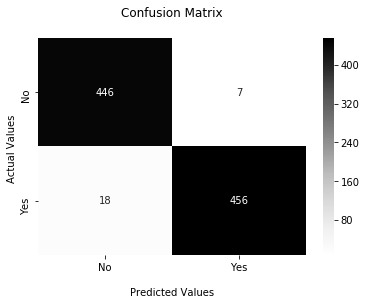

In [29]:
# Plotting confusion matrix using seaborn
ax = sns.heatmap(cm, annot=True, cmap='Greys', fmt = 'd')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()


#### ROC CURVE

In [30]:
preds = model.predict(X_test)

In [31]:
import sklearn.metrics as metrics

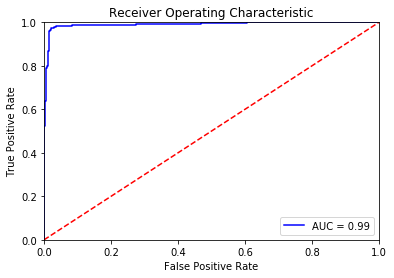

In [32]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Time taken for the code to run

In [33]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 102.31201577186584 seconds ---


#### Visualizing the results

In [34]:
labels =["No",  # index 0
        "Yes",      # index 1
        ]

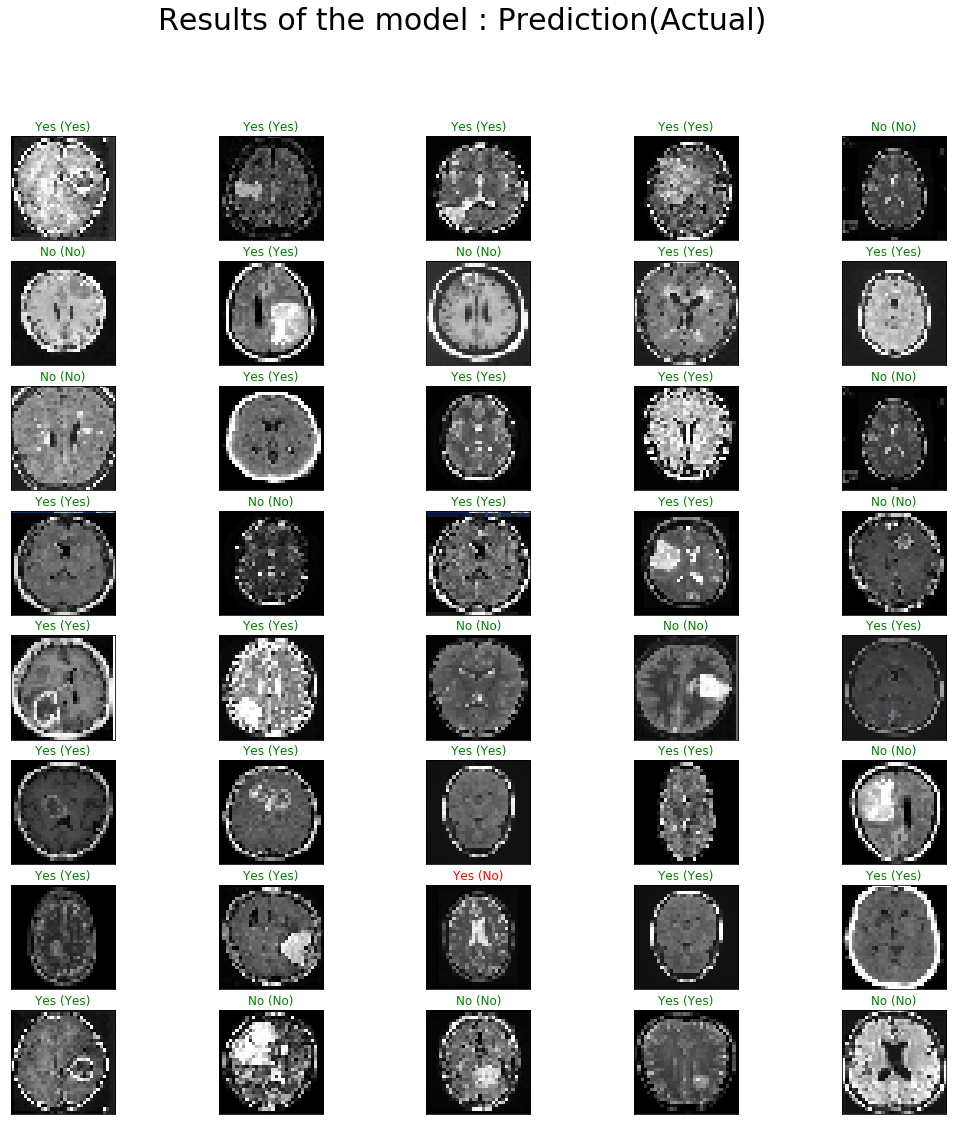

In [35]:
# Plot a random sample of 40 test images, their predicted values and actual values
figure = plt.figure(figsize=(18, 18))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=40, replace=False)):
    ax = figure.add_subplot(8, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = predicted_values[i]
    true_index = y_test[i]
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    plt.suptitle('Results of the model : Prediction(Actual)', fontsize = 30)
#plt.show()
plt.savefig("Results.png")

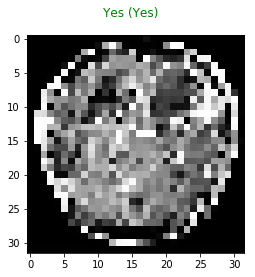

In [36]:
#True Yes
p = np.squeeze(X_test[35])
fig = plt.figure()
plt.imshow(p, interpolation='nearest')
predict_index = predicted_values[35]
true_index = y_test[35]

fig.suptitle("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

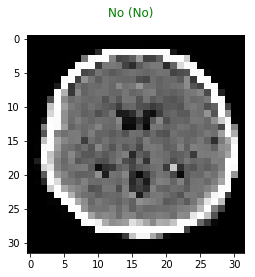

In [37]:
#False No
p = np.squeeze(X_test[187])
fig = plt.figure()
plt.imshow(p, interpolation='nearest')
predict_index = predicted_values[187]
true_index = y_test[187]

fig.suptitle("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [38]:
#Incorrect predictions' indices
M = []
for i in list(range(1, y_test.shape[0])):
    if y_test[i] != predicted_values[i]:
        M.append(i)
M

[32,
 74,
 95,
 96,
 115,
 166,
 205,
 258,
 291,
 344,
 427,
 472,
 488,
 510,
 534,
 539,
 602,
 639,
 707,
 743,
 772,
 812,
 881,
 892,
 900]

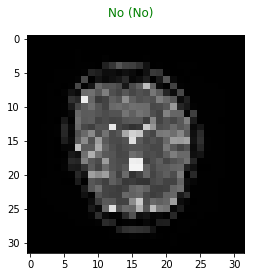

In [39]:
#True No
p = np.squeeze(X_test[4])
fig = plt.figure()
plt.imshow(p, interpolation='nearest')
predict_index = predicted_values[4]
true_index = y_test[4]

fig.suptitle("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

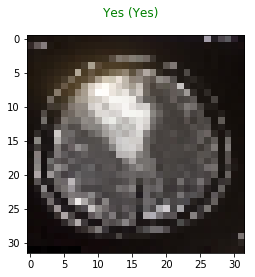

In [40]:
#False No
p = np.squeeze(X_test[60])
fig = plt.figure()
plt.imshow(p, interpolation='nearest')
predict_index = predicted_values[60]
true_index = y_test[60]

fig.suptitle("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

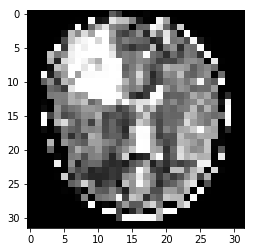

In [41]:
p = np.squeeze(X[0])
fig = plt.figure()
plt.imshow(p, interpolation='nearest')
plt.show

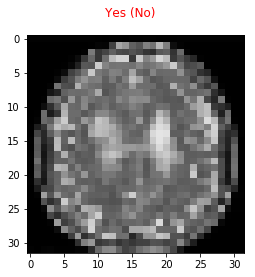

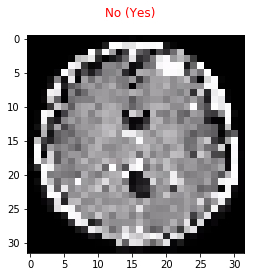

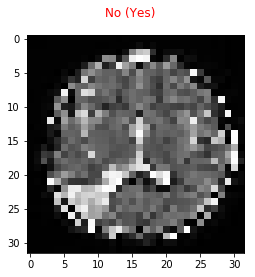

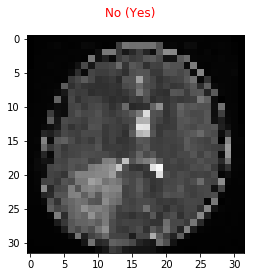

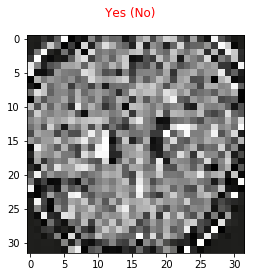

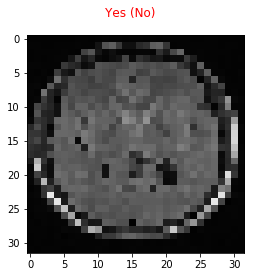

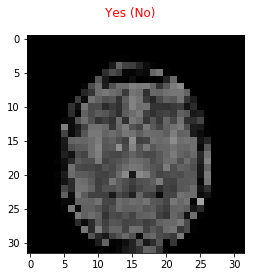

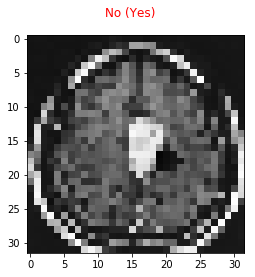

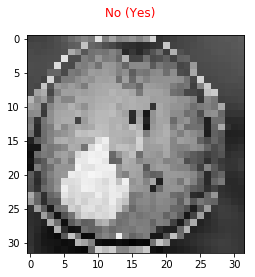

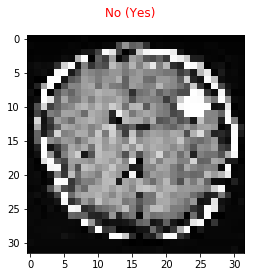

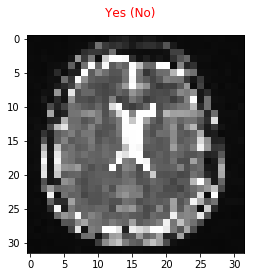

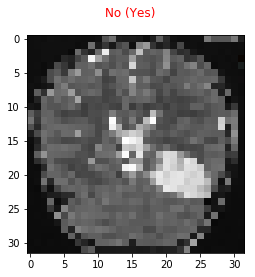

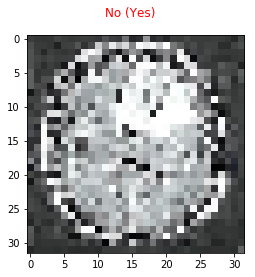

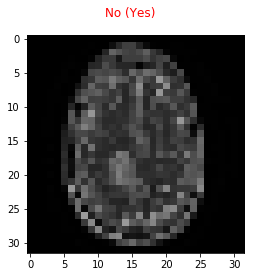

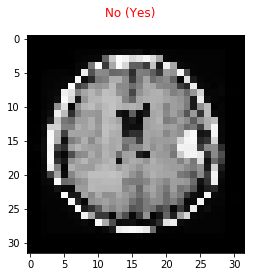

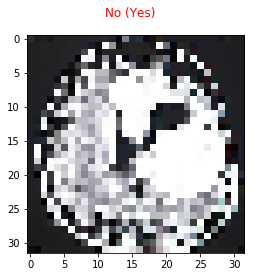

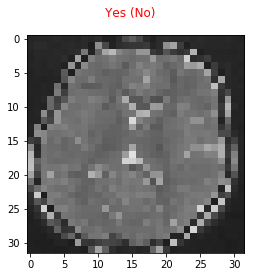

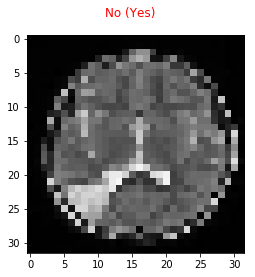

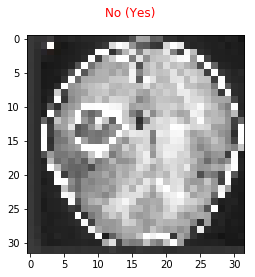

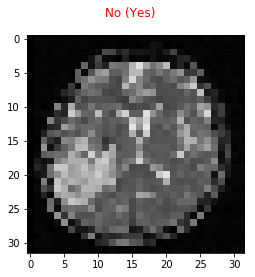

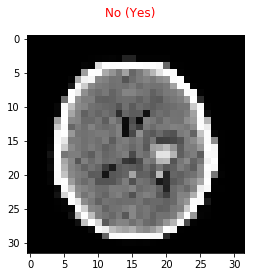

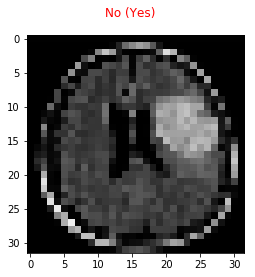

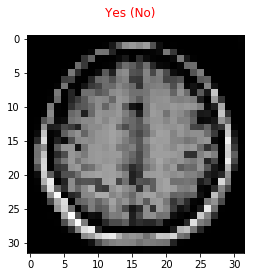

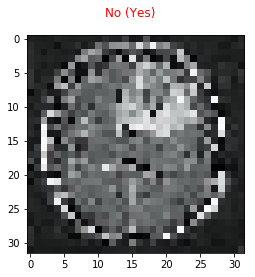

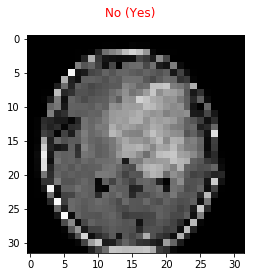

In [42]:
for i in M:
    p = np.squeeze(X_test[i])
    fig = plt.figure()
    plt.imshow(p, interpolation='nearest')
    predict_index = predicted_values[i]
    true_index = y_test[i]

    fig.suptitle("{} ({})".format(labels[predict_index], 
                                      labels[true_index]),
                                      color=("green" if predict_index == true_index else "red"))
    plt.show()

In [43]:
cm

array([[446,   7],
       [ 18, 456]], dtype=int64)

In [44]:
#Precision
precision = cm[1][1] /(cm[1][1] + cm[0][1])
precision

0.9848812095032398

In [45]:
#Recall
recall = cm[1][1] /(cm[1][1] + cm[1][0])
recall

0.9620253164556962

In [46]:
#f1 score
F1_Score = (2*precision*recall)/(precision + recall)
F1_Score

0.9733191035218783

In [47]:
#Specificity
specificity = cm[0][0] /(cm[0][0] + cm[0][1])
specificity

0.9845474613686535